In [1]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

labels_training = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/trocafone_kaggle_test.csv', 
                              low_memory= False)

# labels_training = pd.read_csv('D:/DATOS/RELOADED/csv/labels_training_set.csv',
#                               low_memory= False)
# features = pd.read_csv('D:/DATOS/RELOADED/csv/exp_features.csv', 
#                               low_memory= False)
# kaggle_df = pd.read_csv('D:/DATOS/RELOADED/csv/trocafone_kaggle_test.csv', 
#                               low_memory= False)

In [3]:
features.fillna(0, inplace= True)

In [4]:
test_df = pd.merge(features, labels_training, how='inner', on='person')

In [5]:
test_df.head(5)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana,label
0,1,ad93850f,0.0,20.0,5.0,1.0,4.0,0.0,17.0,0.0,0.0,0.0,5.0,20.0,0.0,0.0,0.0,4.0,0.0,0
1,6,1b9f7cf6,0.0,9.0,3.0,1.0,2.0,0.0,0.0,0.0,7.0,7.0,3.0,9.0,0.0,0.0,0.0,2.0,0.0,0
2,8,de8fe91b,0.0,27.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,1.0,0.0,0
3,9,45baf068,0.0,6.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0
4,10,99abca5a,2.0,630.0,56.0,18.0,45.0,1.0,11.0,0.0,53.0,53.0,31.0,103.0,22.0,0.0,28.0,36.0,4.0,0


In [6]:
X = np.array(test_df.iloc[:, 2:17]) 
y = np.array(test_df['label']) 
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
#Instancio el xgboost
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.35, learning_rate = 0.15, 
                          max_depth = 5, alpha = 5, n_estimators = 50)

In [8]:
#Entreno
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.35, gamma=0, learning_rate=0.15,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [9]:
#prediccion
preds = xg_reg.predict(X_test)

In [10]:
#Error de las predicciones
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.196340


**Importancia de features**

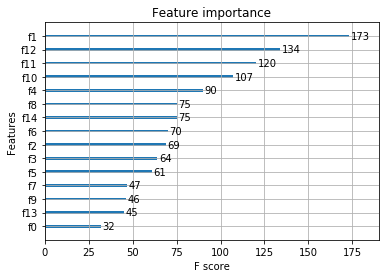

In [11]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [12]:
pred_df = pd.merge(features, kaggle_df, how='inner', on='person')

In [13]:
pred_df.head()

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0,133.0,43.0,0.0,0.0,29.0,9.0
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,7.0,1.0,0.0,1.0,1.0
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0,739.0,235.0,0.0,0.0,21.0,9.0
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,83.0,83.0,10.0,177.0,0.0,0.0,0.0,19.0,0.0


In [14]:
X_train = np.array(test_df.iloc[:, 2:19]) 
y_train = np.array(test_df['label']) 
X_test = np.array(pred_df.iloc[:, 2:19]) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [15]:
xg_reg.fit(X_train,y_train)
pred_df['label'] = xg_reg.predict(X_test)

In [16]:
#Error de las predicciones finales
final_preds_error = np.sqrt(mean_squared_error(y_test, preds))
print("Error: %f" % (final_preds_error))

Error: 0.196340


In [17]:
pred_df.head(20)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana,label
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.010742
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0,133.0,43.0,0.0,0.000000,29.0,9.0,0.094438
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,7.0,1.0,0.000000,1.0,1.0,0.011506
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0,739.0,235.0,0.0,0.000000,21.0,9.0,0.041852
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,83.0,83.0,10.0,177.0,0.0,0.0,0.000000,19.0,0.0,0.020764
5,7,29ebb414,0.0,8.0,4.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,8.0,0.0,0.0,0.000000,3.0,0.0,0.016705
6,11,3dc1950f,0.0,595.0,30.0,3.0,24.0,0.0,10.0,16.0,21.0,21.0,30.0,248.0,51.0,0.0,0.000000,17.0,4.0,0.070122
7,12,8ea4c165,0.0,97.0,7.0,3.0,6.0,3.0,0.0,9.0,0.0,0.0,4.0,87.0,0.0,0.0,0.000000,5.0,0.0,0.030684
8,14,d8cfe234,1.0,39.0,4.0,3.0,4.0,0.0,0.0,8.0,0.0,0.0,4.0,36.0,0.0,0.0,4.000000,3.0,0.0,0.069998
9,17,d6bc64df,0.0,155.0,7.0,2.0,2.0,0.0,18.0,0.0,8.0,8.0,4.0,65.0,0.0,0.0,0.000000,2.0,0.0,0.039200


In [18]:
#Armo el submit
out_df = pred_df[['person', 'label']]
out_df.set_index('person', inplace=True)
out_df.head()

,label
person,
4886f805,0.010742
0297fc1e,0.094438
2d681dd8,0.011506
cccea85e,0.041852
4c8a8b93,0.020764


In [19]:
out_df.to_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/submit.csv')
# out_df.to_csv('D:/DATOS/RELOADED/csv/submit.csv')

In [215]:
out_df[out_df['label'] < 0]

,label
person,


In [216]:
out_df[out_df['label'] > 0.4]

,label
person,
5f7f0c55,0.540334
55c12370,0.523040
5044652b,0.428940
96a88e59,0.422633
f345a49c,0.423641
454693a7,0.516925
34014902,0.420423
c47136a5,0.476027
36818e88,0.588890


**Cross validation**

**n_estimators**

In [100]:
%%capture
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);

In [167]:
%%capture
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_scores = []

for n in range(10, 100, 5):
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=n, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-rmse-mean'])


In [109]:
cv_scores

[0.2676088,
 0.23370600000000002,
 0.219882,
 0.2140694,
 0.21166520000000003,
 0.21064319999999997,
 0.2100666,
 0.20976219999999998,
 0.2094722,
 0.209359,
 0.20916660000000004,
 0.2090068,
 0.20887280000000003,
 0.20871520000000002,
 0.2086964,
 0.2086188,
 0.20856600000000003,
 0.20854239999999996]

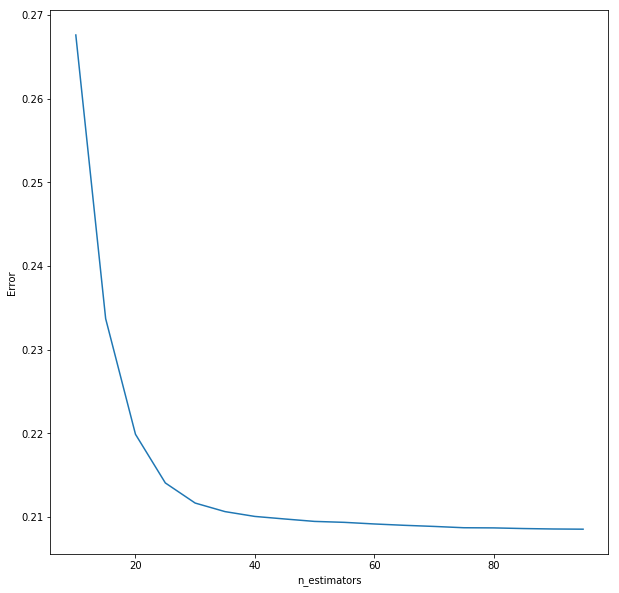

In [168]:
plt.plot(range(10, 100, 5), cv_scores)
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

**learning rate**

In [184]:
cv_scores = []

for n in range(1, 11):
    eta=n*0.05
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': eta, 'max_depth': 5, 'alpha': 10, 'silent': 1}
    print(eta)
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-rmse-mean'])

0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


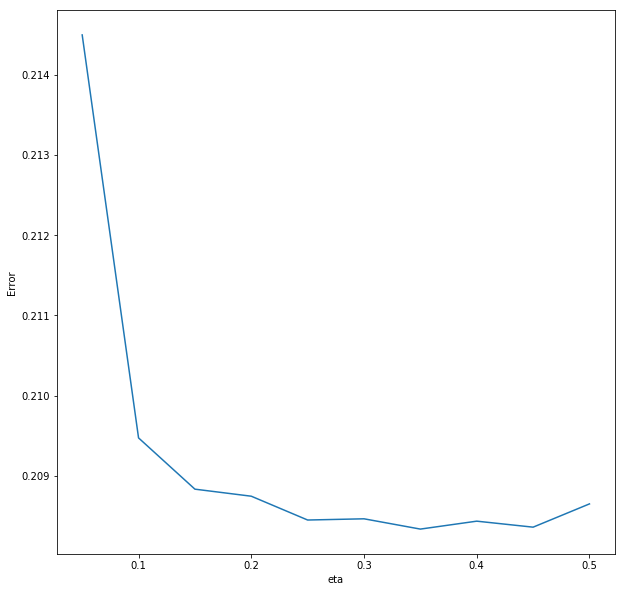

In [185]:
plt.plot([x * 0.05 for x in range(1, 11)], cv_scores)
plt.xlabel('eta')
plt.ylabel('Error')
plt.show()

**max_depth**

In [153]:
cv_scores = []

for n in range(1, 11):
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': n, 'alpha': 10, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=20, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-rmse-mean'])

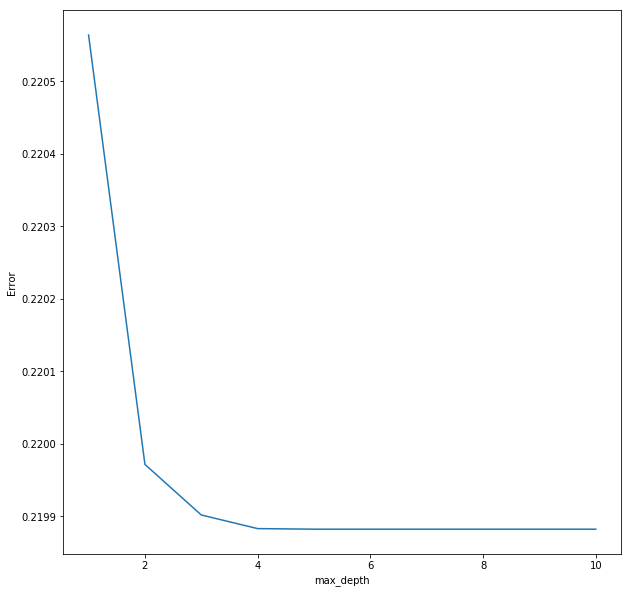

In [154]:
plt.plot([x for x in range(1, 11)], cv_scores)
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()

**colsample_bytree** (Valor muy alto: overfitting)

In [163]:
cv_scores = []

for n in range(1, 16):
    cst=n*0.05
    params = {"objective":"reg:linear",'colsample_bytree': cst,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-rmse-mean'])

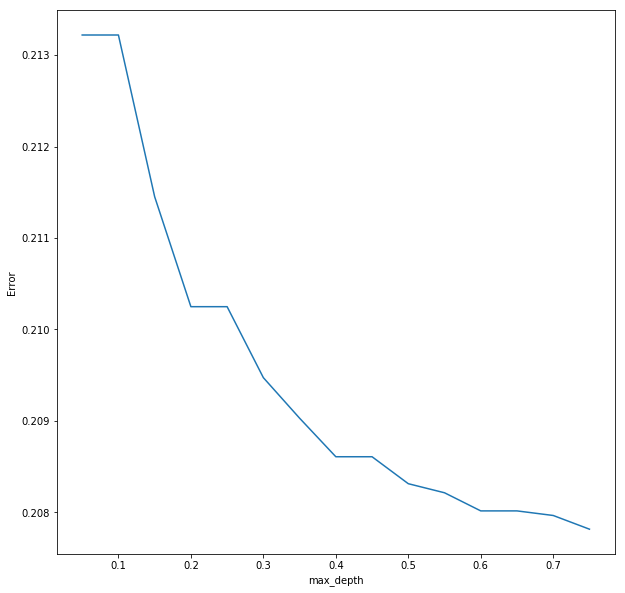

In [164]:
plt.plot([x*0.05 for x in range(1, 16)], cv_scores)
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()

**alpha**

In [176]:
cv_scores = []

for n in range(1, 11):
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': n, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-rmse-mean'])

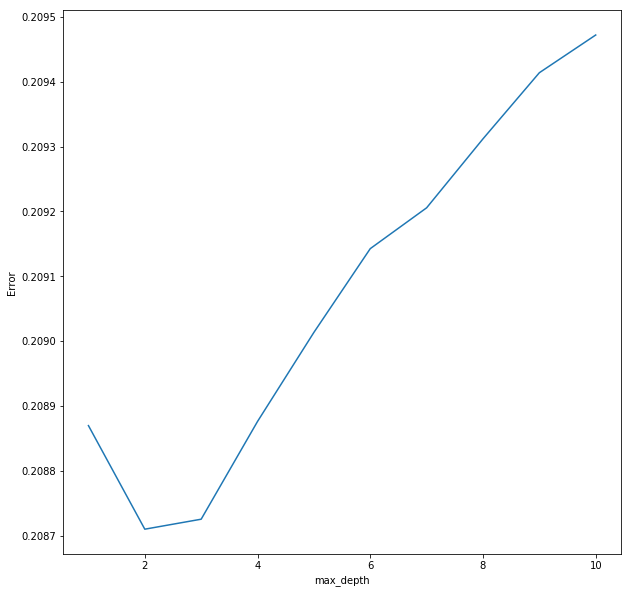

In [177]:
plt.plot([x for x in range(1, 11)], cv_scores)
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()